Converged after 1 iterations.


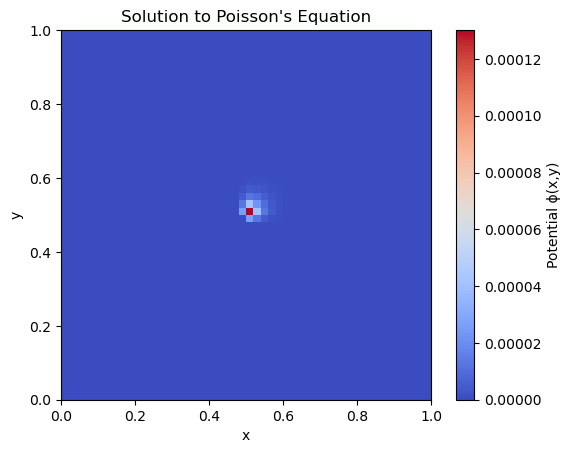

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of grid points in x and y directions
num_x_points = 50
num_y_points = 50

# Physical size of the domain
length_x = 1.0
length_y = 1.0

# Distance between grid points
dx = length_x / (num_x_points - 1)
dy = length_y / (num_y_points - 1)

# Create a grid to represent the charge density (source term)
charge_density = np.zeros((num_x_points, num_y_points))

# Place a point source at the center of the grid
center_x = num_x_points // 2
center_y = num_y_points // 2
charge_density[center_x, center_y] = -1

# Create a grid to store the potential values
potential = np.zeros((num_x_points, num_y_points))

# Set the boundary conditions (potential is zero on the edges)
potential[0, :] = 0  # Left boundary
potential[-1, :] = 0  # Right boundary
potential[:, 0] = 0  # Bottom boundary
potential[:, -1] = 0  # Top boundary

# Function to solve Poisson's equation using Gauss-Seidel method
def solve_poisson(potential, charge_density, dx, dy, max_iterations=5000, tolerance=1e-4):
    for iteration in range(max_iterations):
        # Make a copy of the potential to check for convergence later
        old_potential = potential.copy()
        
        # Update the potential at each point in the grid
        for i in range(1, num_x_points - 1):
            for j in range(1, num_y_points - 1):
                potential[i, j] = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                          potential[i, j+1] + potential[i, j-1] -
                                          dx**2 * charge_density[i, j])
        
        # Check if the solution has converged
        max_diff = np.max(np.abs(potential - old_potential))
        if max_diff < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
    
    return potential

# Solve Poisson's equation
potential = solve_poisson(potential, charge_density, dx, dy)

# Plot the solution
plt.imshow(potential, extent=[0, length_x, 0, length_y], origin='lower', cmap='coolwarm')
plt.colorbar(label="Potential ϕ(x,y)")
plt.title("Solution to Poisson's Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()